In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("dataset/uber.csv")
df

Unnamed: 0                            key  fare_amount   
0         24238194    2015-05-07 19:52:06.0000003          7.5  \
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude   
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354  \
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [ ]:
df.shape

(200000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [6]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.drop(['key', df.columns[0]], axis = 1, inplace = True)

In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  199999.000000     199999.000000    199999.000000      199999.000000   
mean       11.359892        -72.527631        39.935881         -72.525292   
std         9.901760         11.437815         7.720558          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    199999.000000  
mean          39.923890         1.684543  
std            6.794829         1.385995  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x788ca4c8e470>,
 'caps': [<matplotlib.lines.Line2D at 0x788ca4c8e9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x788ca4c8e1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x788ca4c8eef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x788ca4c8f370>],
 'means': []}

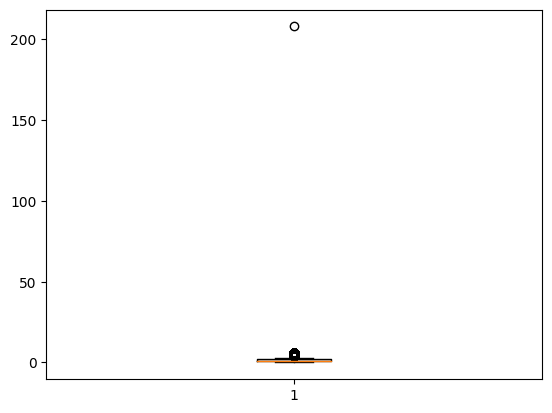

In [11]:
plt.boxplot(df['passenger_count'])

In [12]:
df.drop( df[(df['passenger_count']>100)].index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x788ca52f9450>,
 'caps': [<matplotlib.lines.Line2D at 0x788ca52f9990>,
 'boxes': [<matplotlib.lines.Line2D at 0x788ca52f91b0>],
 'medians': [<matplotlib.lines.Line2D at 0x788ca52f9ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x788ca52fa170>],
 'means': []}

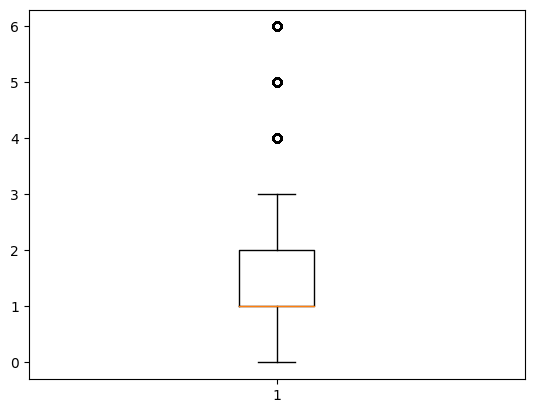

In [13]:
plt.boxplot(df['passenger_count'])

<ipython-input-14-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

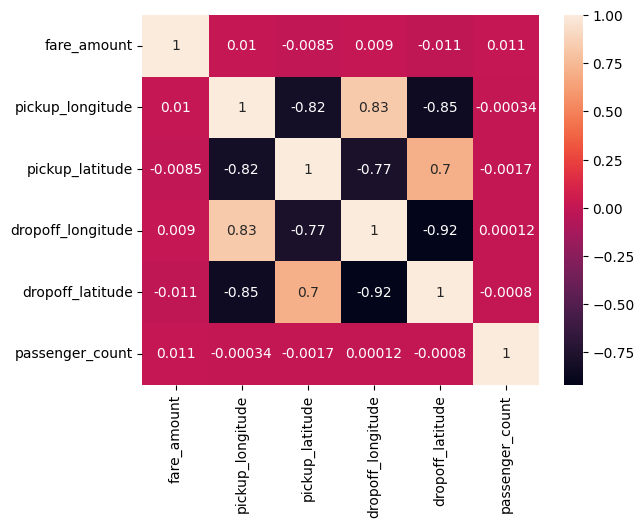

In [14]:
sns.heatmap(df.corr(),annot=True)

d = 2r * arcsin(sqrt(sin²(Δlat/2) + cos(lat1) * cos(lat2) * sin²(Δlon/2)))

In [15]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    radius = 6371

    distance = radius * c

    return distance


In [16]:
df['dist'] = df.apply(lambda row: haversine_distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x788ca196ef50>,
 'caps': [<matplotlib.lines.Line2D at 0x788ca196f1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x788ca196fd00>],
 'medians': [<matplotlib.lines.Line2D at 0x788c9940c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x788c9940c730>],
 'means': []}

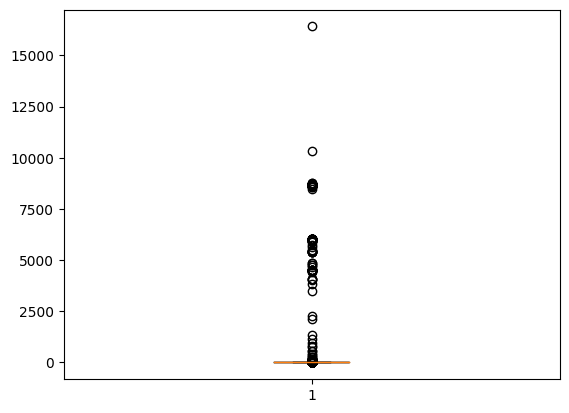

In [17]:
plt.boxplot(df['dist'])

In [18]:
Q1 = df['dist'].quantile(0.25)
Q3 = df['dist'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_no_outliers = df[(df['dist'] >= lower_bound) & (df['dist'] <= upper_bound)]


In [19]:
df.drop(df[(df['dist'] < lower_bound) | (df['dist'] > upper_bound)].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x788c994ded40>,
 'caps': [<matplotlib.lines.Line2D at 0x788c994df280>,
 'boxes': [<matplotlib.lines.Line2D at 0x788c994deaa0>],
 'medians': [<matplotlib.lines.Line2D at 0x788c994df7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x788c994dfa60>],
 'means': []}

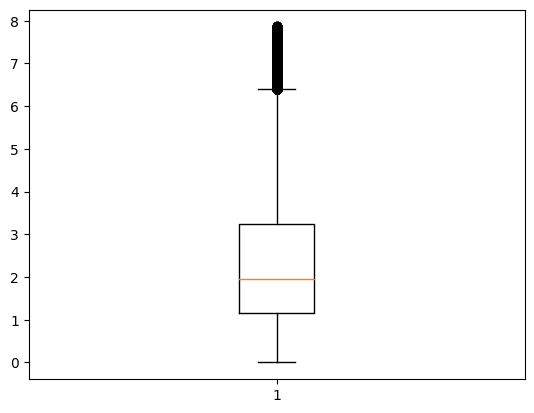

In [20]:
plt.boxplot(df['dist'])

<ipython-input-21-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

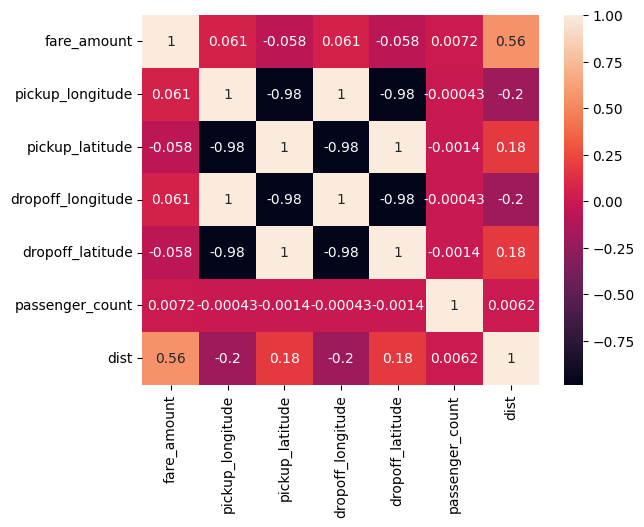

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df["num_date"] = df['pickup_datetime'].dt.day*1000000 + df['pickup_datetime'].dt.month*10000 + df['pickup_datetime'].dt.year

In [23]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist',
       'num_date'],
      dtype='object')

In [24]:
def plot_graph(y_test, y_pred):
    y_test = y_test.to_numpy()
    plt.scatter(y_test, y_pred, color='b', label='Actual vs. Predicted')
    plt.plot(y_test, y_test, color='r', label='Perfect Fit')

    plt.xlim(0, 70)
    plt.ylim(0, 70)

    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')

    plt.legend()
    plt.show()

In [25]:
def test_model(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)

    r_squared = r2_score(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2):", r_squared)
    print("Mean Absolute Error (MAE):", mae)



In [26]:
x = df[[  'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist',
       'num_date']]
y = df['fare_amount']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
def build_and_test(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_model(y_test,y_pred)
    plot_graph(y_test, y_pred)

Mean Squared Error (MSE): 32.325056931492945
Root Mean Squared Error (RMSE): 5.685512899597796
R-squared (R2): 0.26406731904080993
Mean Absolute Error (MAE): 2.1687838865032063


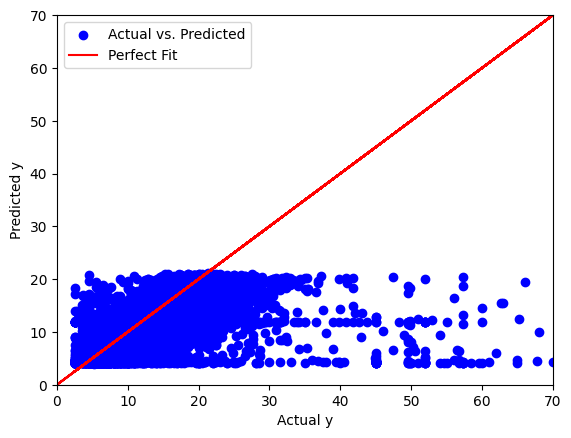

In [29]:
lr = LinearRegression()
build_and_test(lr)

Mean Squared Error (MSE): 28.48598323809375
Root Mean Squared Error (RMSE): 5.337226174530525
R-squared (R2): 0.35147009768311444
Mean Absolute Error (MAE): 2.0076735866995876


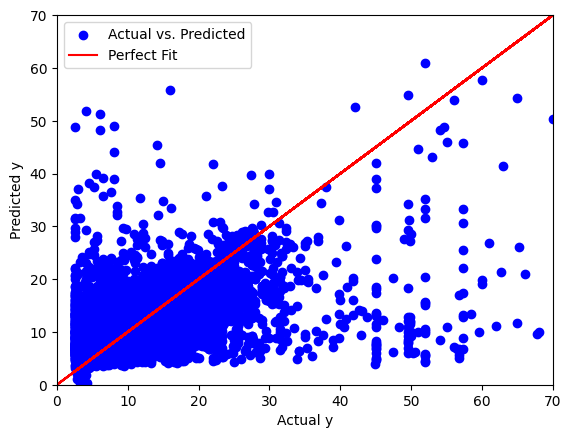

In [30]:
rfr = RandomForestRegressor(n_estimators=70)
build_and_test(rfr)